<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/work_from_here/nifty_%25above_above_50_dma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance --q

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
nifty50_url = "https://archives.nseindia.com/content/indices/ind_nifty50list.csv"
nifty50 = pd.read_csv(nifty50_url)
tickers = nifty50['Symbol'].apply(lambda x: x + ".NS").tolist()
# Bank Nifty Stocks
bank_nifty_stocks = tickers

def calculate_percentage_above_moving_average(stock_list,periods,start_date):
    data = yf.download(stock_list, start=start_date)
    data = data['Adj Close']
    
    # Calculate the moving average using ewm with min_periods set to 50
    ma = data.ewm(span=periods, min_periods=periods).mean()

    above_ma = data > ma
    percentage = (above_ma.sum(axis=1) / len(stock_list)) * 100
    
    return percentage

# Calculate the percentage of stocks above their 50 DMA for each day
percentage_above_dma = calculate_percentage_above_moving_average(bank_nifty_stocks,50,'2022-01-01')
percentage_20_dma=calculate_percentage_above_moving_average(bank_nifty_stocks,20,'2022-01-01')
# Download the Bank Nifty index data
bank_nifty = yf.download('^NSEI', start='2022-01-01')

# Reindex Bank Nifty index data to match percentage_above_dma
aligned_bank_nifty_close = bank_nifty['Adj Close'].reindex(percentage_above_dma.index)




[*********************100%***********************]  50 of 50 completed
[*********************100%***********************]  50 of 50 completed
[*********************100%***********************]  1 of 1 completed


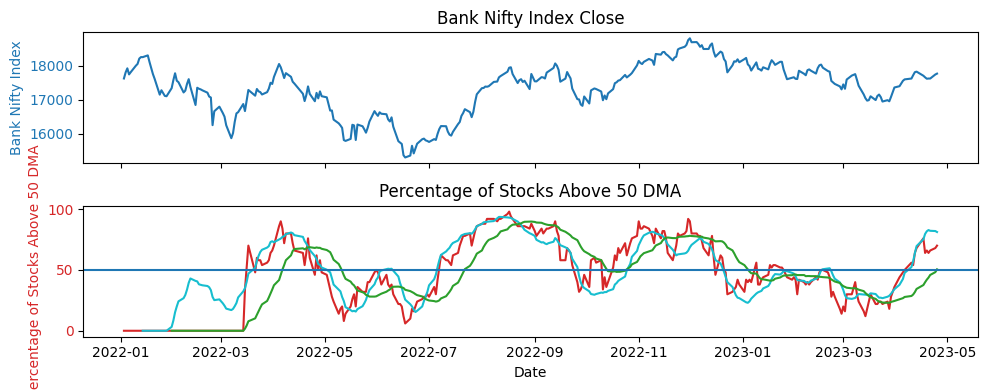

In [3]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,4), sharex=True)

# Plot the Bank Nifty index close
ax1.set_ylabel('Bank Nifty Index', color='tab:blue')
ax1.plot(aligned_bank_nifty_close.index, aligned_bank_nifty_close, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_title('Bank Nifty Index Close')

# Plot the percentage of stocks above their 50 DMA
ax2.set_xlabel('Date')
ax2.set_ylabel('Percentage of Stocks Above 50 DMA', color='tab:red')
ax2.plot(percentage_above_dma.index, percentage_above_dma, color='tab:red')
ax2.plot(percentage_20_dma.index, percentage_20_dma.rolling(window=10).mean(), color='tab:cyan')
ax2.plot(percentage_above_dma.index, percentage_above_dma.rolling(window=20).mean(), color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_title('Percentage of Stocks Above 50 DMA')
ax2.axhline(y=50)
fig.tight_layout()
plt.show()
